In [1]:
import pandas as pd
import warnings 
import numpy as np

warnings.filterwarnings('ignore')

df = pd.read_csv('../price.csv',index_col=['stock_id','date'],parse_dates=['date'])
df = df.rename(columns={
    '開盤價':'open',
    '最高價':'high',
    '最低價':'low',
    '收盤價':'close',
    '成交金額':'volume'
})
df = df[['open','high','low','close','volume']]
df = df.loc[df['volume']>0]
df = df.apply(pd.to_numeric,errors='coerce')
df = df.loc['2330']
df

,open,high,low,close,volume
date,,,,,
2007-01-02,67.8,68.0,67.3,67.7,1768131919
2007-01-03,67.8,68.7,67.5,68.0,2875024398
2007-01-04,67.7,68.1,67.6,67.7,1514454033
2007-01-05,67.5,67.7,66.5,66.9,2048997239
2007-01-08,66.1,66.5,65.7,65.8,1595029837
...,...,...,...,...,...
2022-06-28,496.0,500.0,496.0,497.5,8392290378
2022-06-29,496.0,498.5,491.0,491.0,16352376816
2022-06-30,484.5,486.5,476.0,476.0,23900613642


<Axes: xlabel='date'>

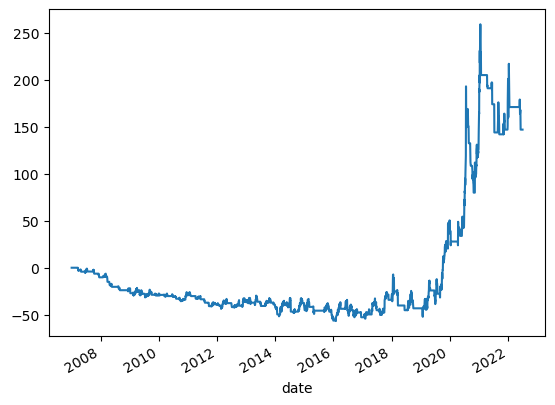

In [2]:
df['hold'] = np.nan
condition_buy = (df['close'].rolling(20).max() == df['close'])
condition_sell = df['close']<df['close'].rolling(20).mean()

df.loc[condition_buy, 'hold'] = 1
df.loc[condition_sell, 'hold'] = 0

df['hold'].ffill(inplace=True)
df['hold'] = df['hold'].fillna(0)

df['earn'] = 0

df['earn'].loc[df['hold'] == 1] = df['open'].shift(-2)-df['open'].shift(-1)

df['earn'].cumsum().plot()

10 10 124.45000000000005
10 26 199.75
10 27 214.05
10 35 216.5
10 36 232.79999999999995
10 42 243.79999999999995
10 44 247.44999999999993
10 48 249.84999999999997
10 53 251.7
10 78 263.75
10 79 264.15
11 78 268.34999999999997
11 79 268.75
13 78 270.45
13 79 270.84999999999997
16 42 275.99999999999994
16 53 288.29999999999995
16 78 289.54999999999995
18 42 301.9
25 42 308.04999999999995
28 42 308.34999999999997
64 42 312.9
64 78 316.9


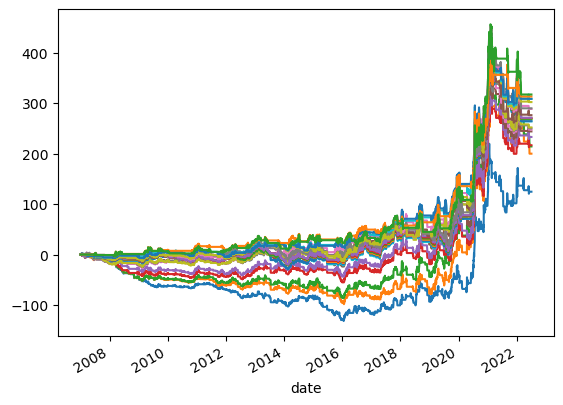

In [3]:
# 最佳化
highest_earning = 0

for i in range(10,90,1):
    for j in range(10,90,1):
        df['hold'] = np.nan
        condition_buy = (df['close'].rolling(i).max() == df['close'])
        condition_sell = df['close']<df['close'].rolling(j).mean()
        
        df.loc[condition_buy, 'hold'] = 1
        df.loc[condition_sell, 'hold'] = 0
        
        df['hold'].ffill(inplace=True)
        df['hold'] = df['hold'].fillna(0)
        
        df['earn'] = 0
        
        df['earn'].loc[df['hold'] == 1] = df['open'].shift(-2)-df['open'].shift(-1)
        
        if df['earn'].cumsum().dropna().iloc[-1]>highest_earning:
                    print(i,j,df['earn'].cumsum().dropna().iloc[-1])
                    highest_earning = df['earn'].cumsum().dropna().iloc[-1]
                    df['earn'].cumsum().plot()

316.9


Start date,2007-01-02
End date,2022-07-04
Total months,181
,Backtest
Annual return,8.179%
Cumulative returns,229.171%
Annual volatility,16.823%
Sharpe ratio,0.55
Calmar ratio,0.36
Stability,0.79
Max drawdown,-22.592%


Worst drawdown periods,Net drawdown in %,Peak date,Valley date,Recovery date,Duration
0,22.59,2013-02-19,2014-02-18,2017-06-05,1120
1,20.04,2021-02-05,2022-02-23,NaT,NaN
2,18.74,2009-05-26,2010-11-22,2012-03-26,740
3,16.55,2018-09-04,2019-03-07,2019-10-14,290
4,10.97,2008-03-20,2008-03-27,2009-03-17,259


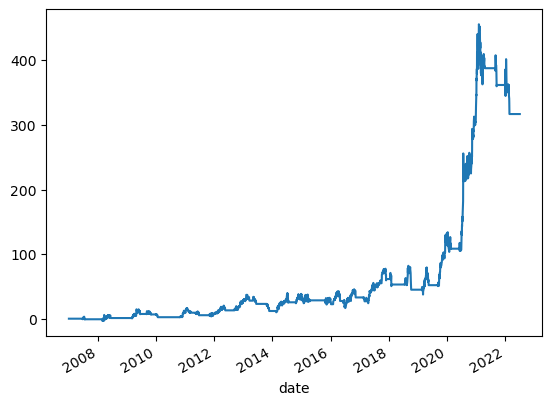

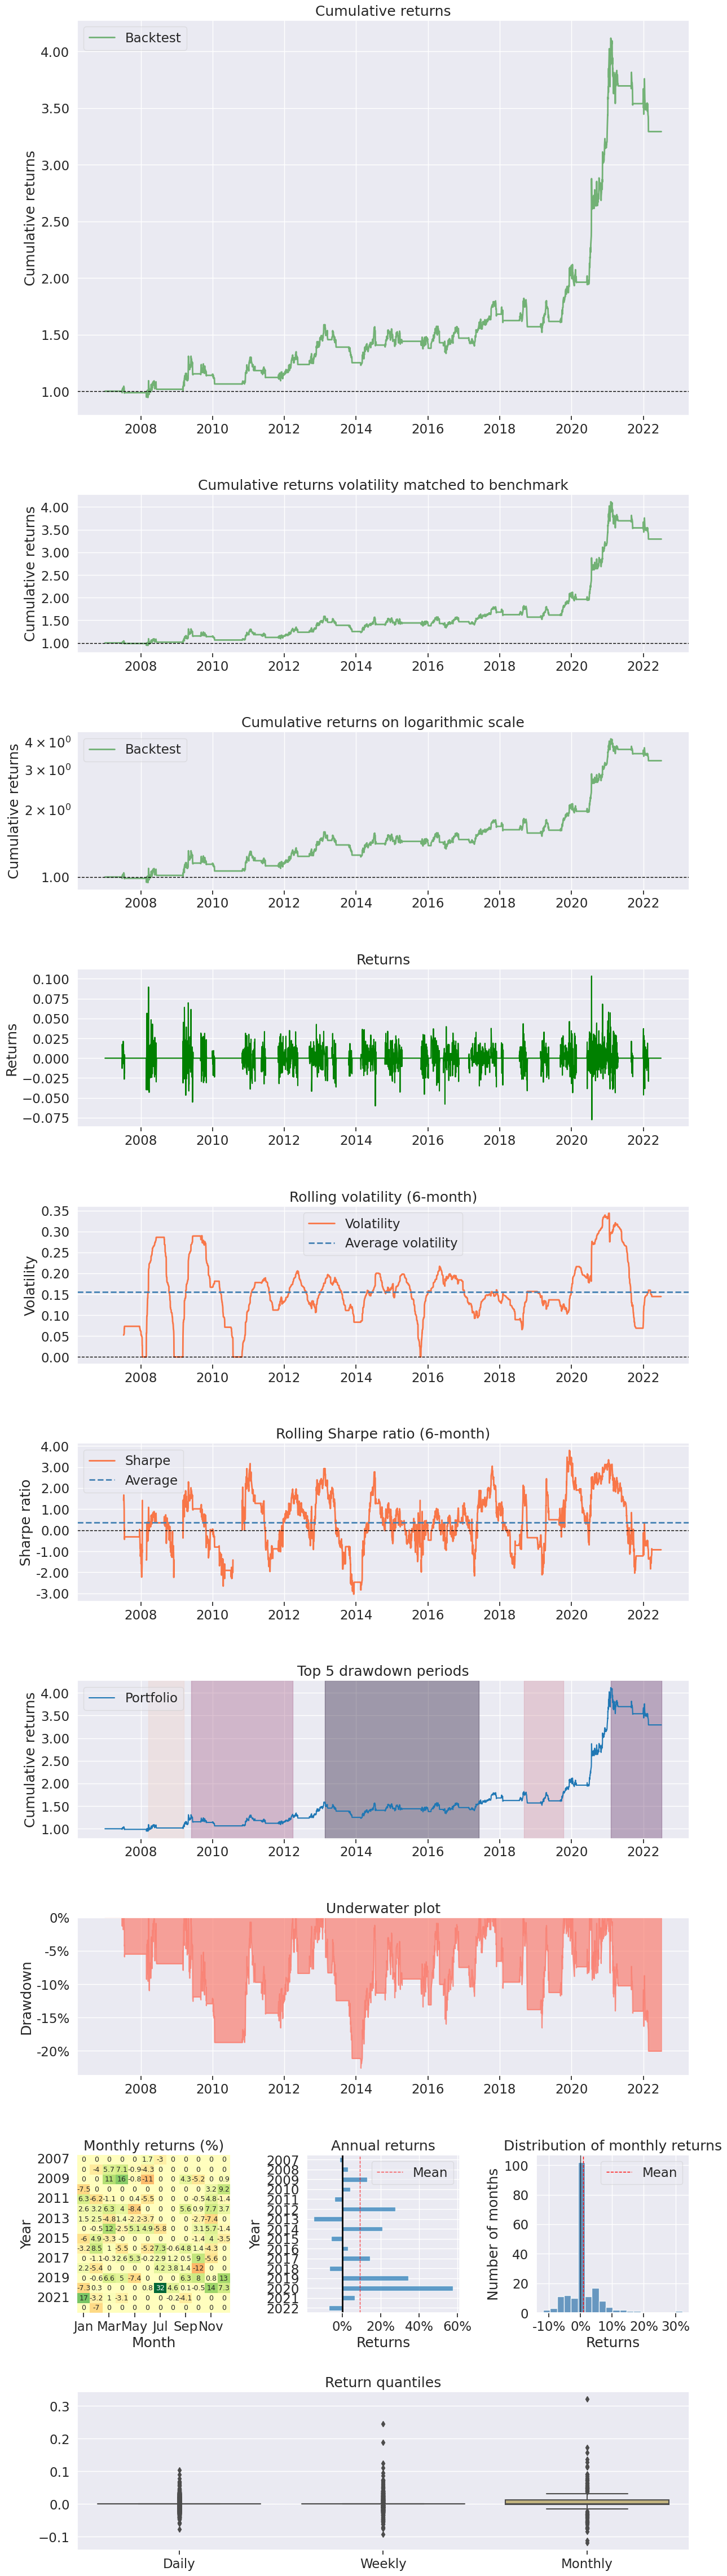

In [5]:
df['hold'] = np.nan
condition_buy = (df['close'].rolling(64).max() == df['close'])
condition_sell = df['close']<df['close'].rolling(78).mean()

df.loc[condition_buy, 'hold'] = 1
df.loc[condition_sell, 'hold'] = 0

df['hold'].ffill(inplace=True)
df['hold'] = df['hold'].fillna(0)

df['earn'] = 0

df['earn'].loc[df['hold'] == 1] = df['open'].shift(-2)-df['open'].shift(-1)

print(df['earn'].cumsum().dropna().iloc[-1])
df['earn'].cumsum().plot()

# pip install pyfolio-reloaded
import pyfolio as pf

pf.create_returns_tear_sheet(df['earn']/df['open'].shift(-1))

# Annual return	年報酬
# Cumulative returns累積報酬率
# Sharpe ratio	最有價值的欄位  評斷策略好不好的最關鍵指標 大於1很好大於1.5超級好 小於0.5就不要用了